In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sl
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [49]:
data = pd.read_csv('ClearCarInform.csv')
data.pop('Unnamed: 0')
data

,Mark,Model,Year,Oil,Volume,Power,GSB,Drive,Color,Kilometers,Wheel,Generation,Complectation,Price
0,Лада,4x4 2121 Нива,2003,бензин,1.7,79,механика,4WD,белый,1,левый,1 поколение,1.7 MT Base,175000
1,Лада,Гранта,2020,бензин,1.6,98,АКПП,передний,серый,27455,левый,"1 поколение, рестайлинг",0,767000
2,Лада,Веста,2020,бензин,1.6,113,вариатор,передний,белый,20652,левый,1 поколение,0,1200000
3,Лада,Калина,2011,бензин,1.6,98,механика,передний,серый,226867,0,1 поколение,0,285500
4,Лада,Гранта,2016,бензин,1.6,87,механика,передний,белый,63000,левый,1 поколение,0,449000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Лада,Калина,2006,бензин,1.6,81,механика,передний,красный,125400,0,1 поколение,1.6 MT 11183-30-046 Норма,200000
1996,Лада,2106,1999,бензин,1.6,75,механика,задний,зеленый,45000,левый,1 поколение,0,120000
1997,Лада,Калина,2009,бензин,1.4,88,механика,передний,серебристый,151000,0,1 поколение,1.4 MT Люкс 11194-33-036,185000
1998,Лада,Гранта,2017,бензин,1.6,87,механика,передний,коричневый,100000,левый,1 поколение,1.6 MT Comfort,515000


In [50]:
data = data.loc[:, data.columns != 'Mark']

In [51]:
for i in data.columns:
    data[i] = data[i].replace('0', np.NaN)

C:\Users\Sergey\AppData\Local\Temp/ipykernel_3752/1521816039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data[i].replace('0', np.NaN)


In [52]:
data = data.dropna()

In [53]:
categorial_features = ['Model', 'Oil', 'GSB', 'Drive', 'Color', 'Wheel', 'Generation', 'Complectation']
real_features = ['Year', 'Volume', 'Power', 'Kilometers']
target_feature = 'Price'

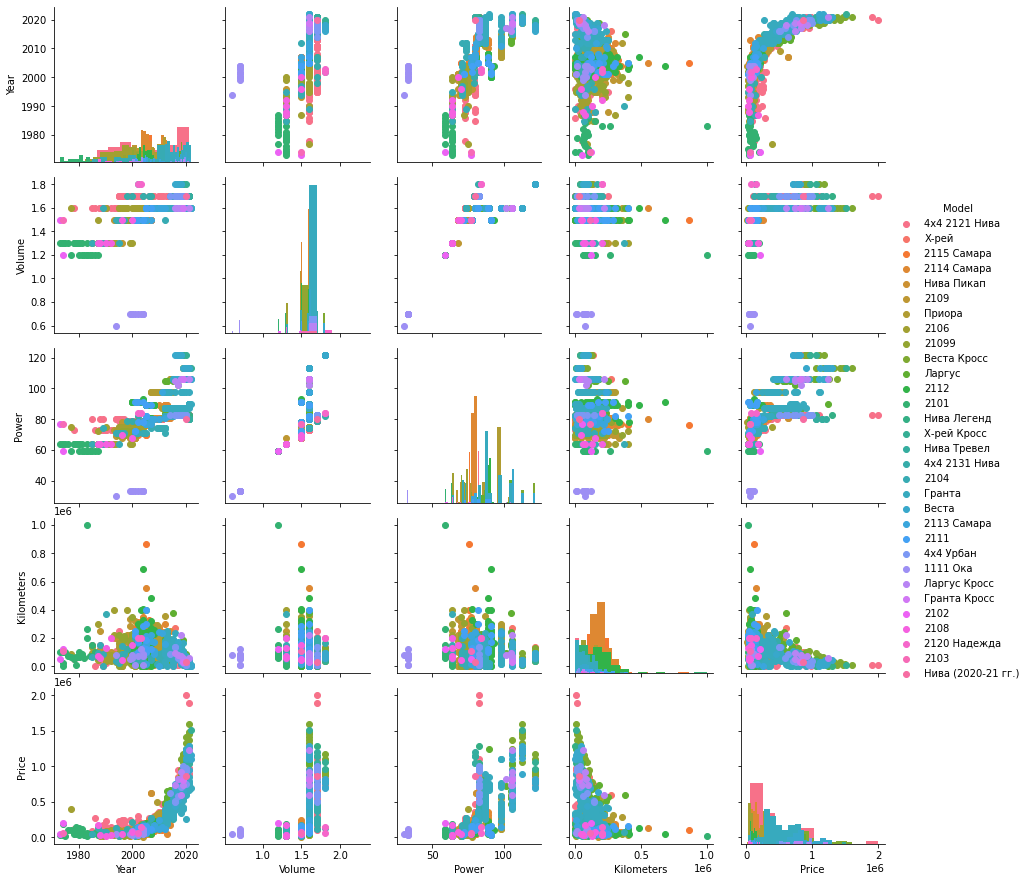

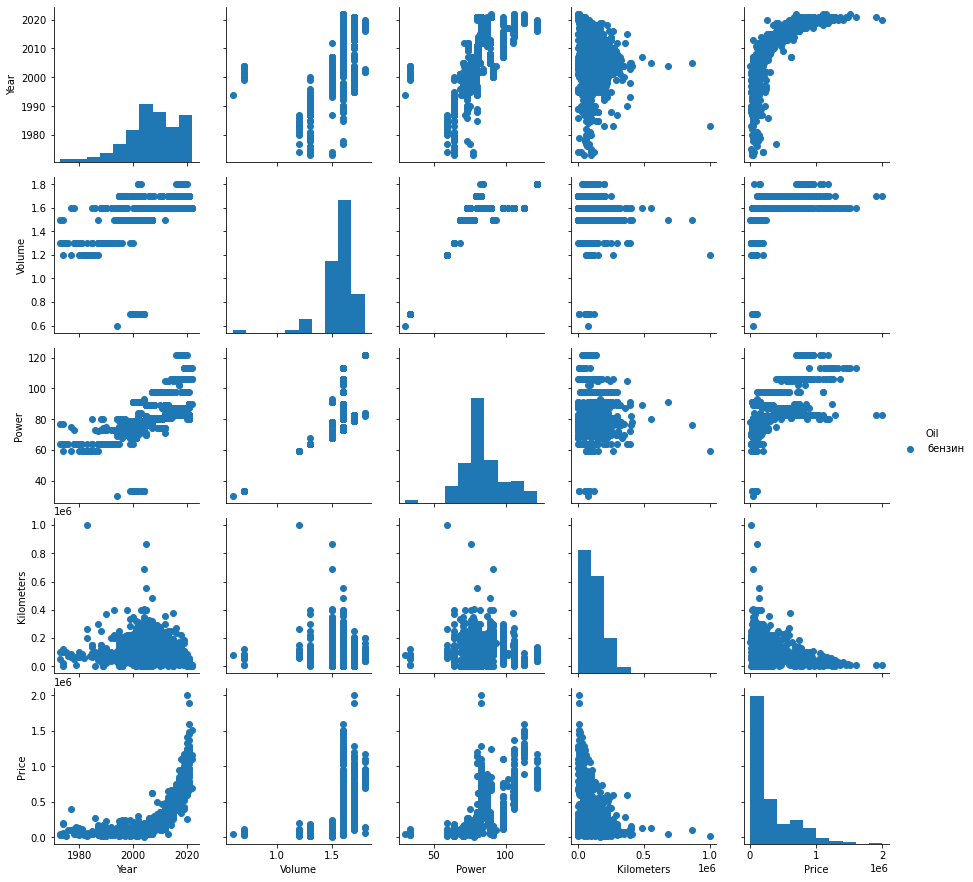

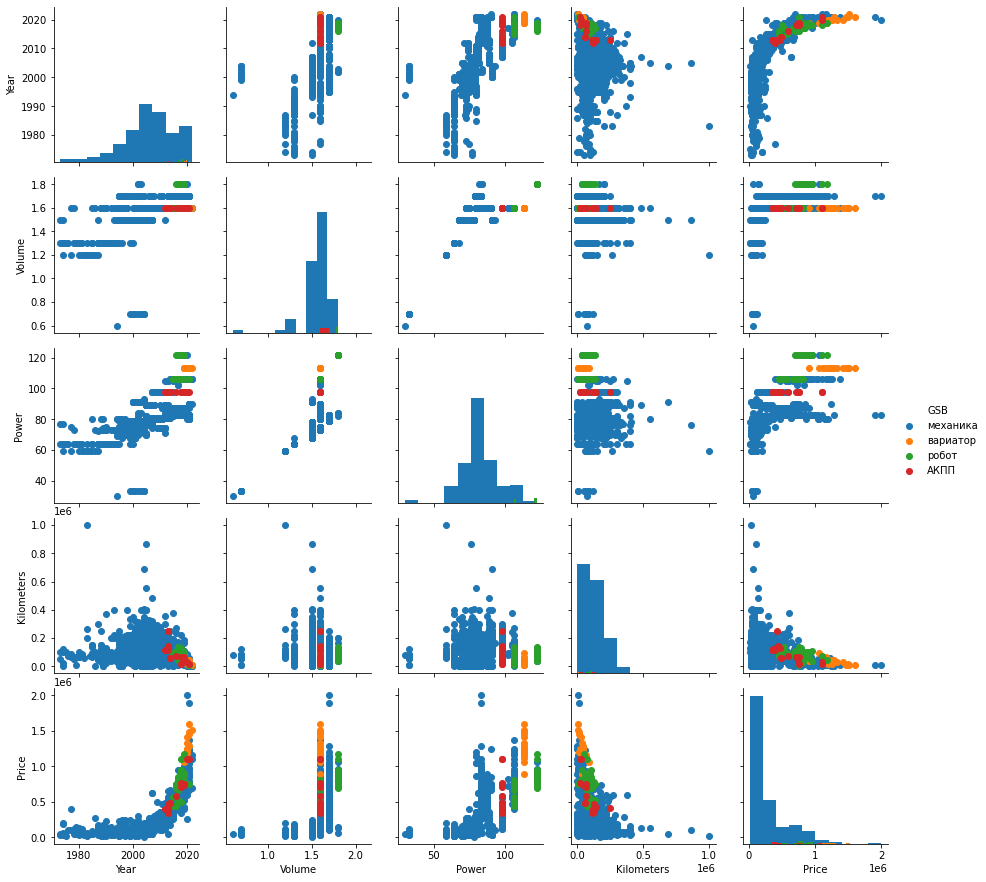

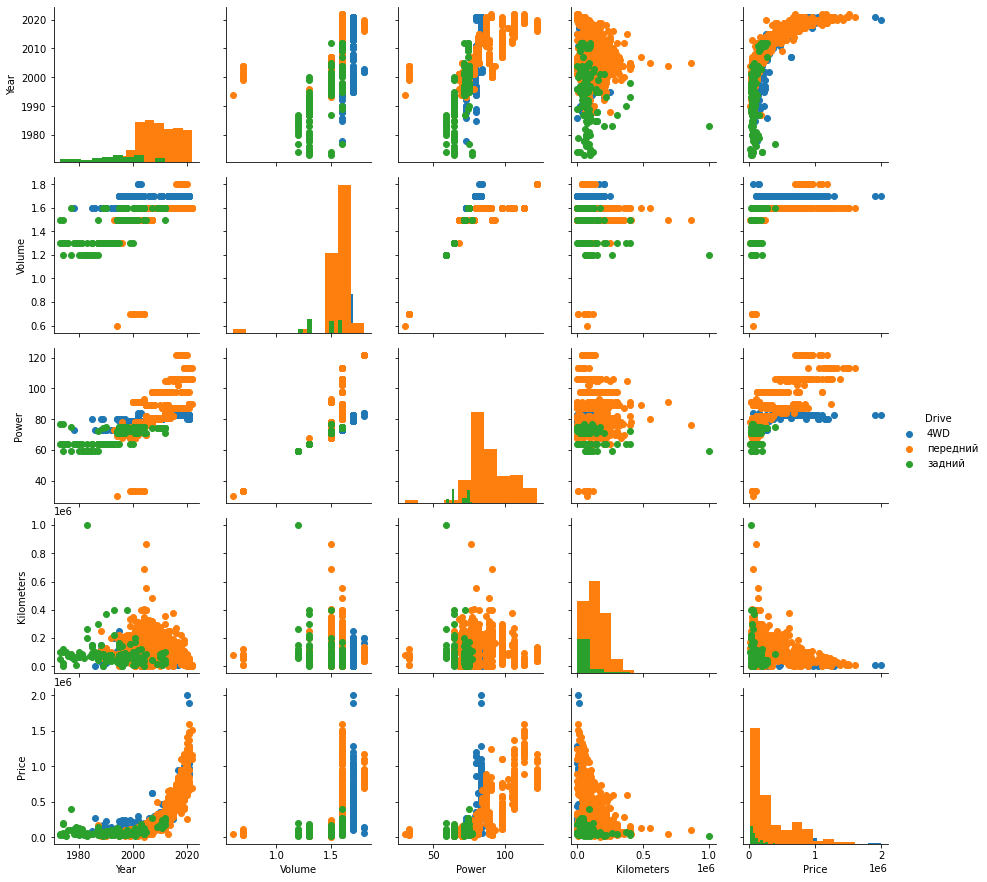

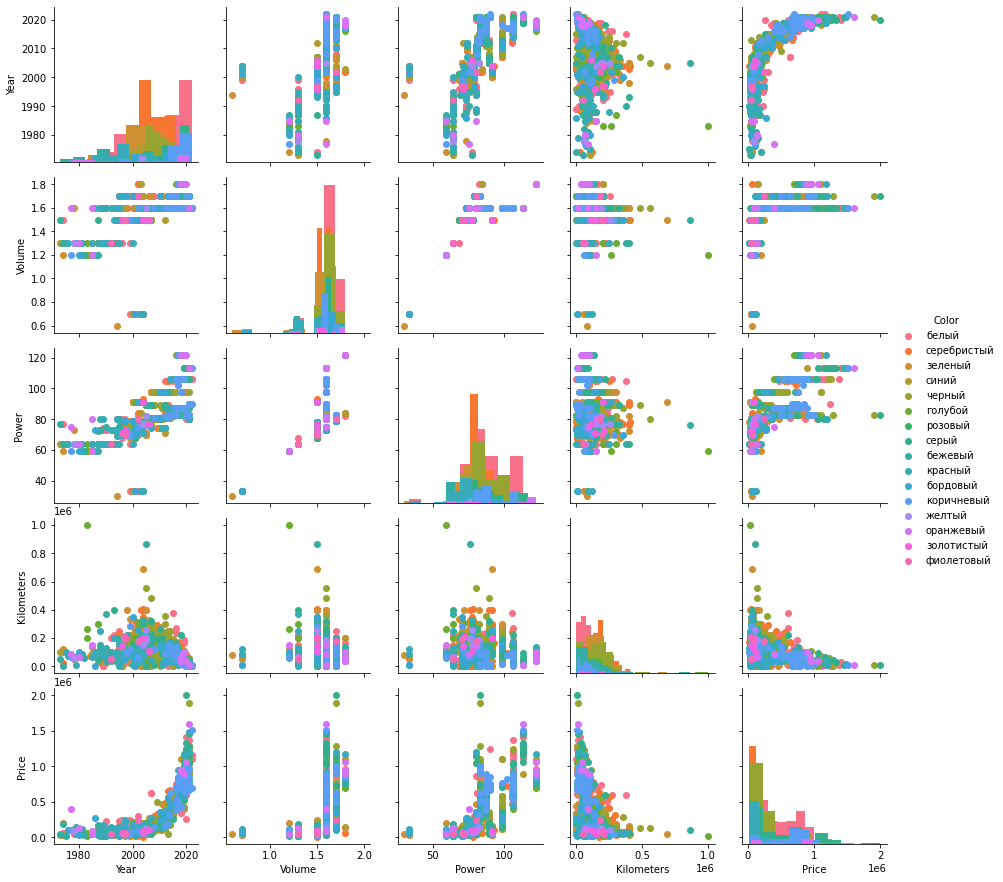

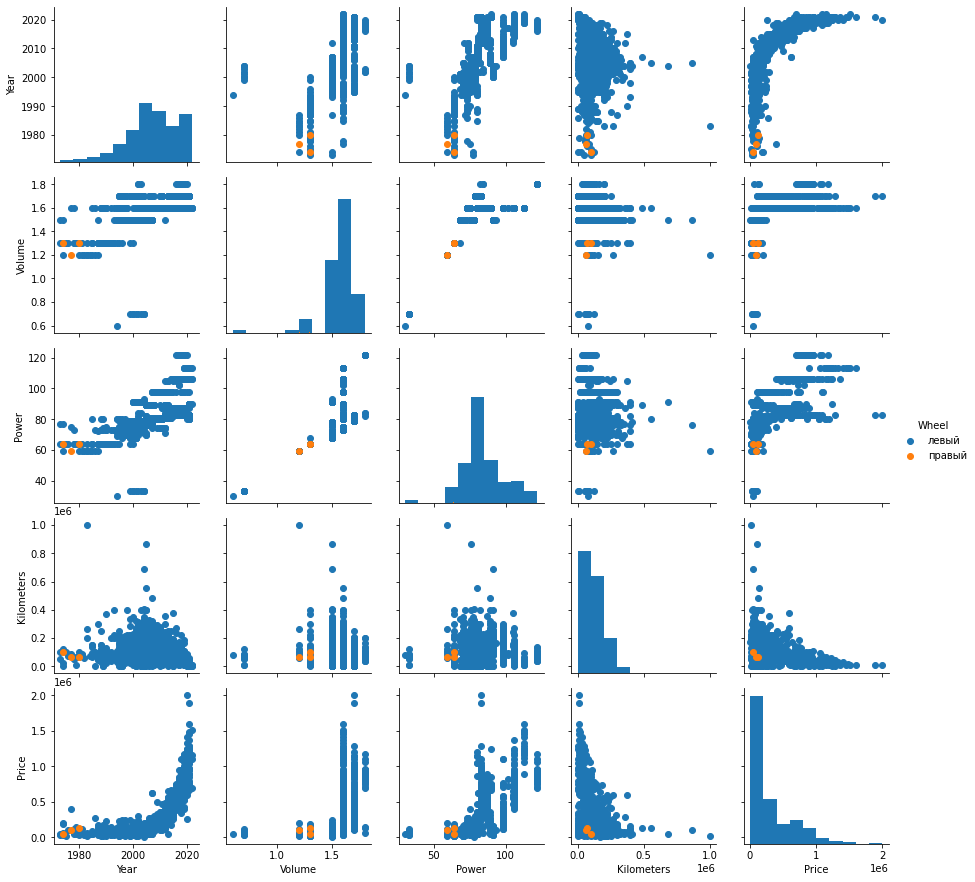

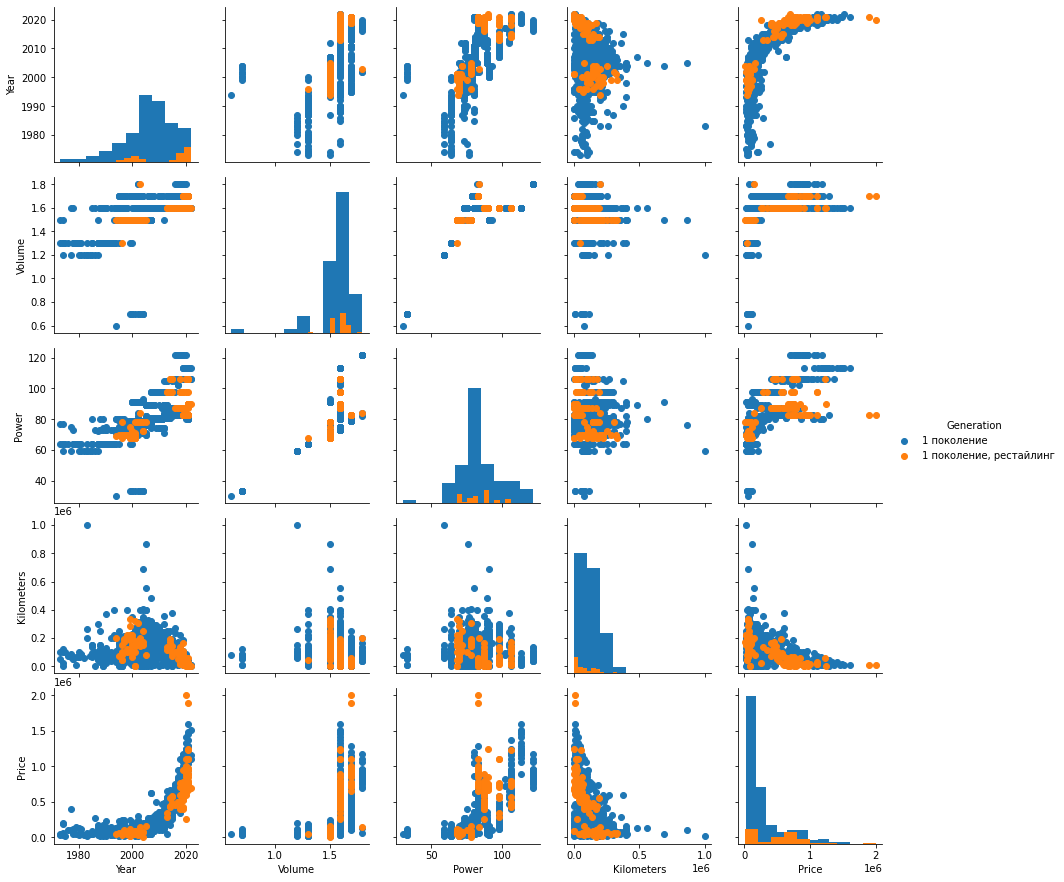

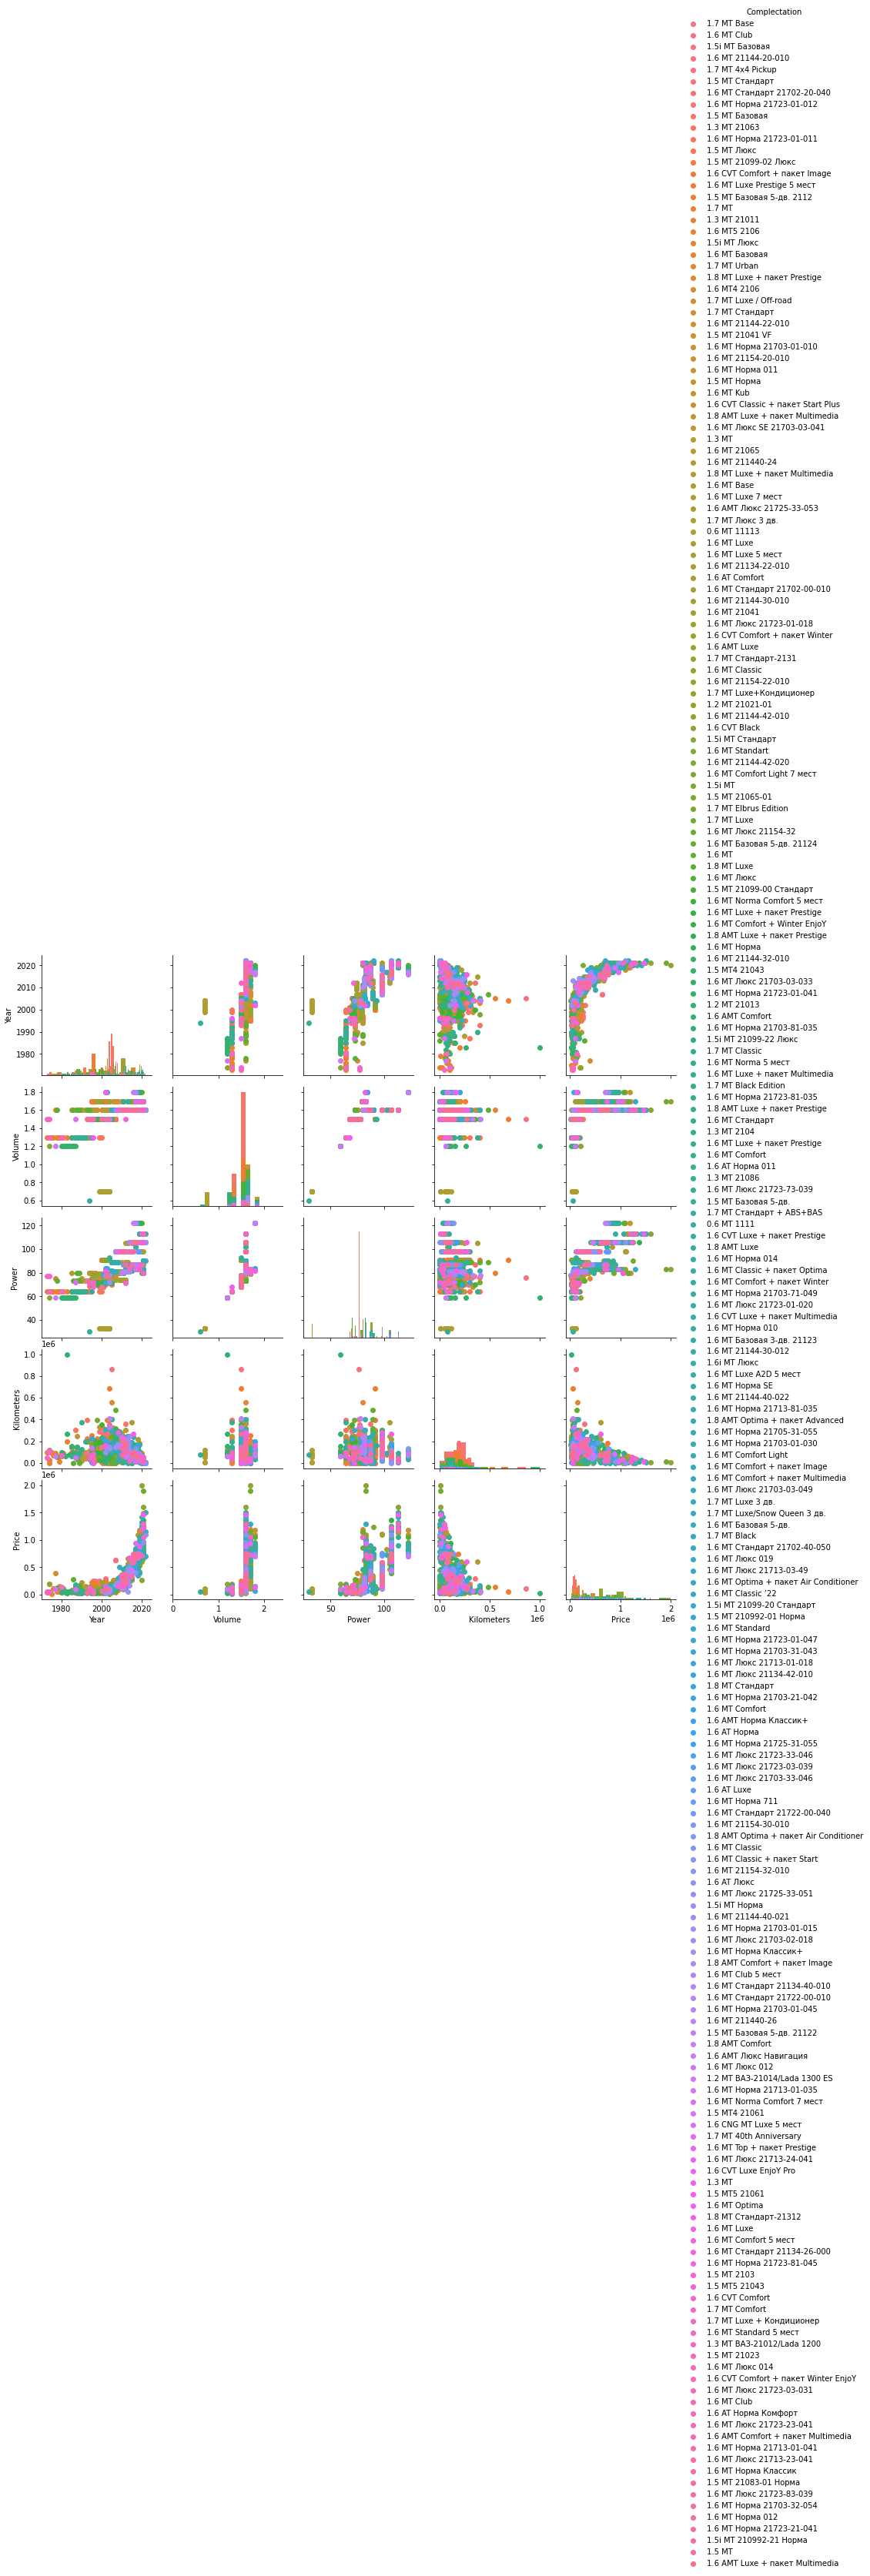

In [54]:
for i in categorial_features:
    g = sns.PairGrid(data[['Year', 'Volume', 'Power', 'Kilometers', 'Price', i]], hue=i)
    g.map_diag (plt.hist)
    g.map_offdiag (plt.scatter)
    g.add_legend()

In [55]:
s = []
for i in data.columns:
    Unicmodels = pd.unique(data[i])
    s.append(Unicmodels)

In [56]:
encoder = OneHotEncoder(sparse=False)
train_cat = encoder.fit_transform(data[categorial_features])  # обучаем и кодируем
train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
encoder.categories_

[array(['1111 Ока', '2101', '2102', '2103', '2104', '2106', '2108', '2109',
        '21099', '2111', '2112', '2113 Самара', '2114 Самара',
        '2115 Самара', '2120 Надежда', '4x4 2121 Нива', '4x4 2131 Нива',
        '4x4 Урбан', 'Веста', 'Веста Кросс', 'Гранта', 'Гранта Кросс',
        'Ларгус', 'Ларгус Кросс', 'Нива (2020-21 гг.)', 'Нива Легенд',
        'Нива Пикап', 'Нива Тревел', 'Приора', 'Х-рей', 'Х-рей Кросс'],
       dtype=object),
 array(['бензин'], dtype=object),
 array(['АКПП', 'вариатор', 'механика', 'робот'], dtype=object),
 array(['4WD', 'задний', 'передний'], dtype=object),
 array(['бежевый', 'белый', 'бордовый', 'голубой', 'желтый', 'зеленый',
        'золотистый', 'коричневый', 'красный', 'оранжевый', 'розовый',
        'серебристый', 'серый', 'синий', 'фиолетовый', 'черный'],
       dtype=object),
 array(['левый', 'правый'], dtype=object),
 array(['1 поколение', '1 поколение, рестайлинг'], dtype=object),
 array(['0.6 MT 1111', '0.6 MT 11113', '1.2 MT 21013', '1.2 

In [58]:
X_train = np.hstack([data[real_features], train_cat])
X_train.shape

(975, 284)

In [59]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, data[target_feature])  # обучаем

LinearRegression()

In [60]:
model.coef_

array([ 7.82869288e+03,  4.74420735e+10,  8.07851291e+03, -1.55342261e-01,
        2.81072280e+10,  6.74249907e+09,  3.20554903e+09, -1.15373771e+09,
       -1.13323327e+09, -2.61303881e+09,  4.38663910e+09,  2.64787806e+09,
        1.57330940e+09,  2.64797190e+09, -4.60026273e+08, -2.20818399e+09,
       -2.20818310e+09, -2.20810341e+09, -2.76908383e+09, -4.16255646e+08,
       -4.16329967e+08, -5.94870737e+08, -4.24917636e+09, -4.24900746e+09,
       -4.24938591e+09, -1.45396244e+09, -2.52058307e+09, -2.52047161e+09,
       -4.16232768e+08, -5.28445331e+08, -3.96466971e+08, -4.15884041e+08,
       -2.84549876e+09, -5.03807575e+09, -4.24875090e+09, -2.30074986e+04,
        6.11951444e+08,  6.42773786e+08, -6.26899421e+08, -6.27283481e+08,
       -5.95443840e+09,  5.04897681e+09,  9.04892292e+08, -1.78732864e+04,
       -4.86176251e+04, -2.41883361e+04, -3.88347017e+04, -4.18765818e+04,
       -4.20602376e+04, -3.96520009e+04, -2.70352706e+04, -4.33759801e+04,
        8.15363581e+04, -

In [61]:
model.intercept_

-72168895247.02158

In [63]:
train_preds = model.predict(X_train)

In [65]:
data['Pred_Price'] = train_preds

In [70]:
data['Price_Delta'] = data['Price'] - data['Pred_Price']
data['Price_Delta_Percent'] = data['Price_Delta'] * 100 / data['Price']

In [71]:
data

,Model,Year,Oil,Volume,Power,GSB,Drive,Color,Kilometers,Wheel,Generation,Complectation,Price,Pred_Price,Price_Delta,Price_Delta_Percent
0,4x4 2121 Нива,2003,бензин,1.7,79,механика,4WD,белый,1,левый,1 поколение,1.7 MT Base,175000,243897.328018,-68897.328018,-39.369902
6,Х-рей,2019,бензин,1.6,106,механика,передний,белый,32000,левый,1 поколение,1.6 МТ Club,949500,949495.117874,4.882126,0.000514
8,2115 Самара,2004,бензин,1.5,76,механика,передний,серебристый,200000,левый,1 поколение,1.5i MT Базовая,174000,95055.644577,78944.355423,45.370319
9,2114 Самара,2007,бензин,1.6,81,механика,передний,серебристый,150000,левый,1 поколение,1.6 MT 21144-20-010,100000,127784.707382,-27784.707382,-27.784707
11,Нива Пикап,2007,бензин,1.7,81,механика,4WD,белый,46000,левый,1 поколение,1.7 MT 4x4 Pickup,630000,630006.220825,-6.220825,-0.000987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,4x4 2121 Нива,2002,бензин,1.7,79,механика,4WD,бордовый,141749,левый,1 поколение,1.7 MT Base,205000,238478.469406,-33478.469406,-16.330961
1988,Гранта,2012,бензин,1.6,87,механика,передний,серебристый,178000,левый,1 поколение,1.6 MT Норма,300000,334863.751495,-34863.751495,-11.621250
1991,2115 Самара,2006,бензин,1.5,76,механика,передний,черный,90000,левый,1 поколение,1.5i MT Базовая,100000,138709.383591,-38709.383591,-38.709384
1998,Гранта,2017,бензин,1.6,87,механика,передний,коричневый,100000,левый,1 поколение,1.6 MT Comfort,515000,498096.443436,16903.556564,3.282244


In [67]:
data.to_csv('Predict.csv')